In [27]:
from cv2 import calcHist, equalizeHist, imread
import numpy as np
from skimage.io import imsave, imshow
import matplotlib.pyplot as plt
from skimage.exposure import equalize_hist

# Ler imagens

In [28]:
img = imread('yuyu-hakusho-01.jpg',0)
img2 = imread('yuyu-hakusho-02.jpg',0)
img3 = imread('yuyu-hakusho-03.jpg',0)
img4 = imread('yuyu-hakusho-04.jpg',0)

Text(0.5, 1.0, 'Imagem 04')

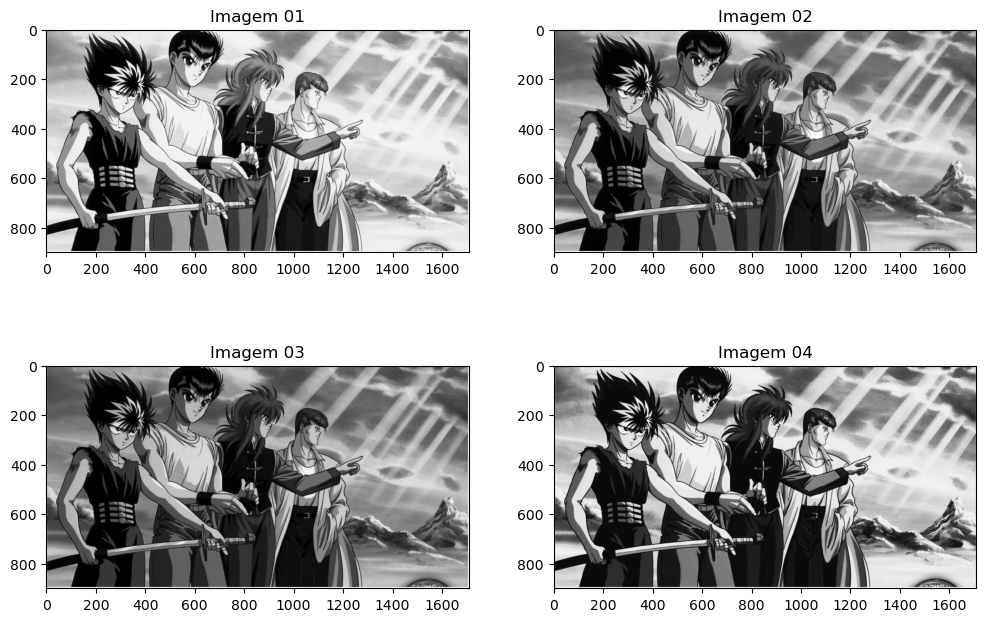

In [29]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.set_title('Imagem 01')

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(img2, cmap='gray')
ax2.set_title('Imagem 02')

ax3 = fig.add_subplot(2,2,3)
ax3.imshow(img3, cmap='gray')
ax3.set_title('Imagem 03')

ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img4, cmap='gray')
ax4.set_title('Imagem 04')

# Visualizar histograma

Text(0.5, 1.0, 'Histograma 04')

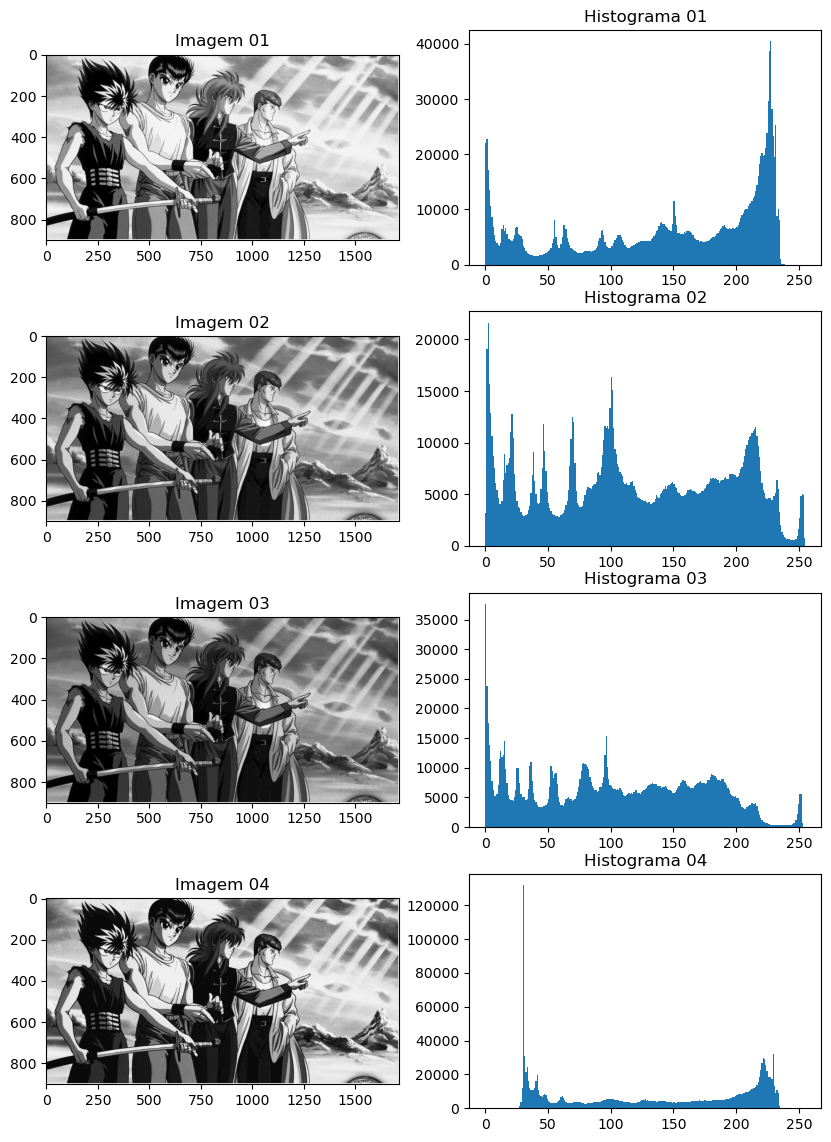

In [30]:
fig, ax = plt.subplots(4, 2, figsize=(10,14))

ax[0, 0].imshow(img, cmap='gray')
ax[0, 0].set_title('Imagem 01')
ax[0,1].hist(img.ravel(),range(256))
ax[0,1].set_title('Histograma 01')

ax[1, 0].imshow(img2, cmap='gray')
ax[1, 0].set_title('Imagem 02')
ax[1,1].hist(img2.ravel(),range(256))
ax[1,1].set_title('Histograma 02')

ax[2, 0].imshow(img3, cmap='gray')
ax[2, 0].set_title('Imagem 03')
ax[2,1].hist(img3.ravel(),range(256))
ax[2,1].set_title('Histograma 03')

ax[3, 0].imshow(img4, cmap='gray')
ax[3, 0].set_title('Imagem 04')
ax[3,1].hist(img4.ravel(),range(256))
ax[3,1].set_title('Histograma 04')

# Equalização do histograma (Skimage)

In [31]:
newHist = equalize_hist(img)
newHist2 = equalize_hist(img2)
newHist3 = equalize_hist(img3)
newHist4 = equalize_hist(img4)

Text(0.5, 1.0, 'Histograma Equalizado')

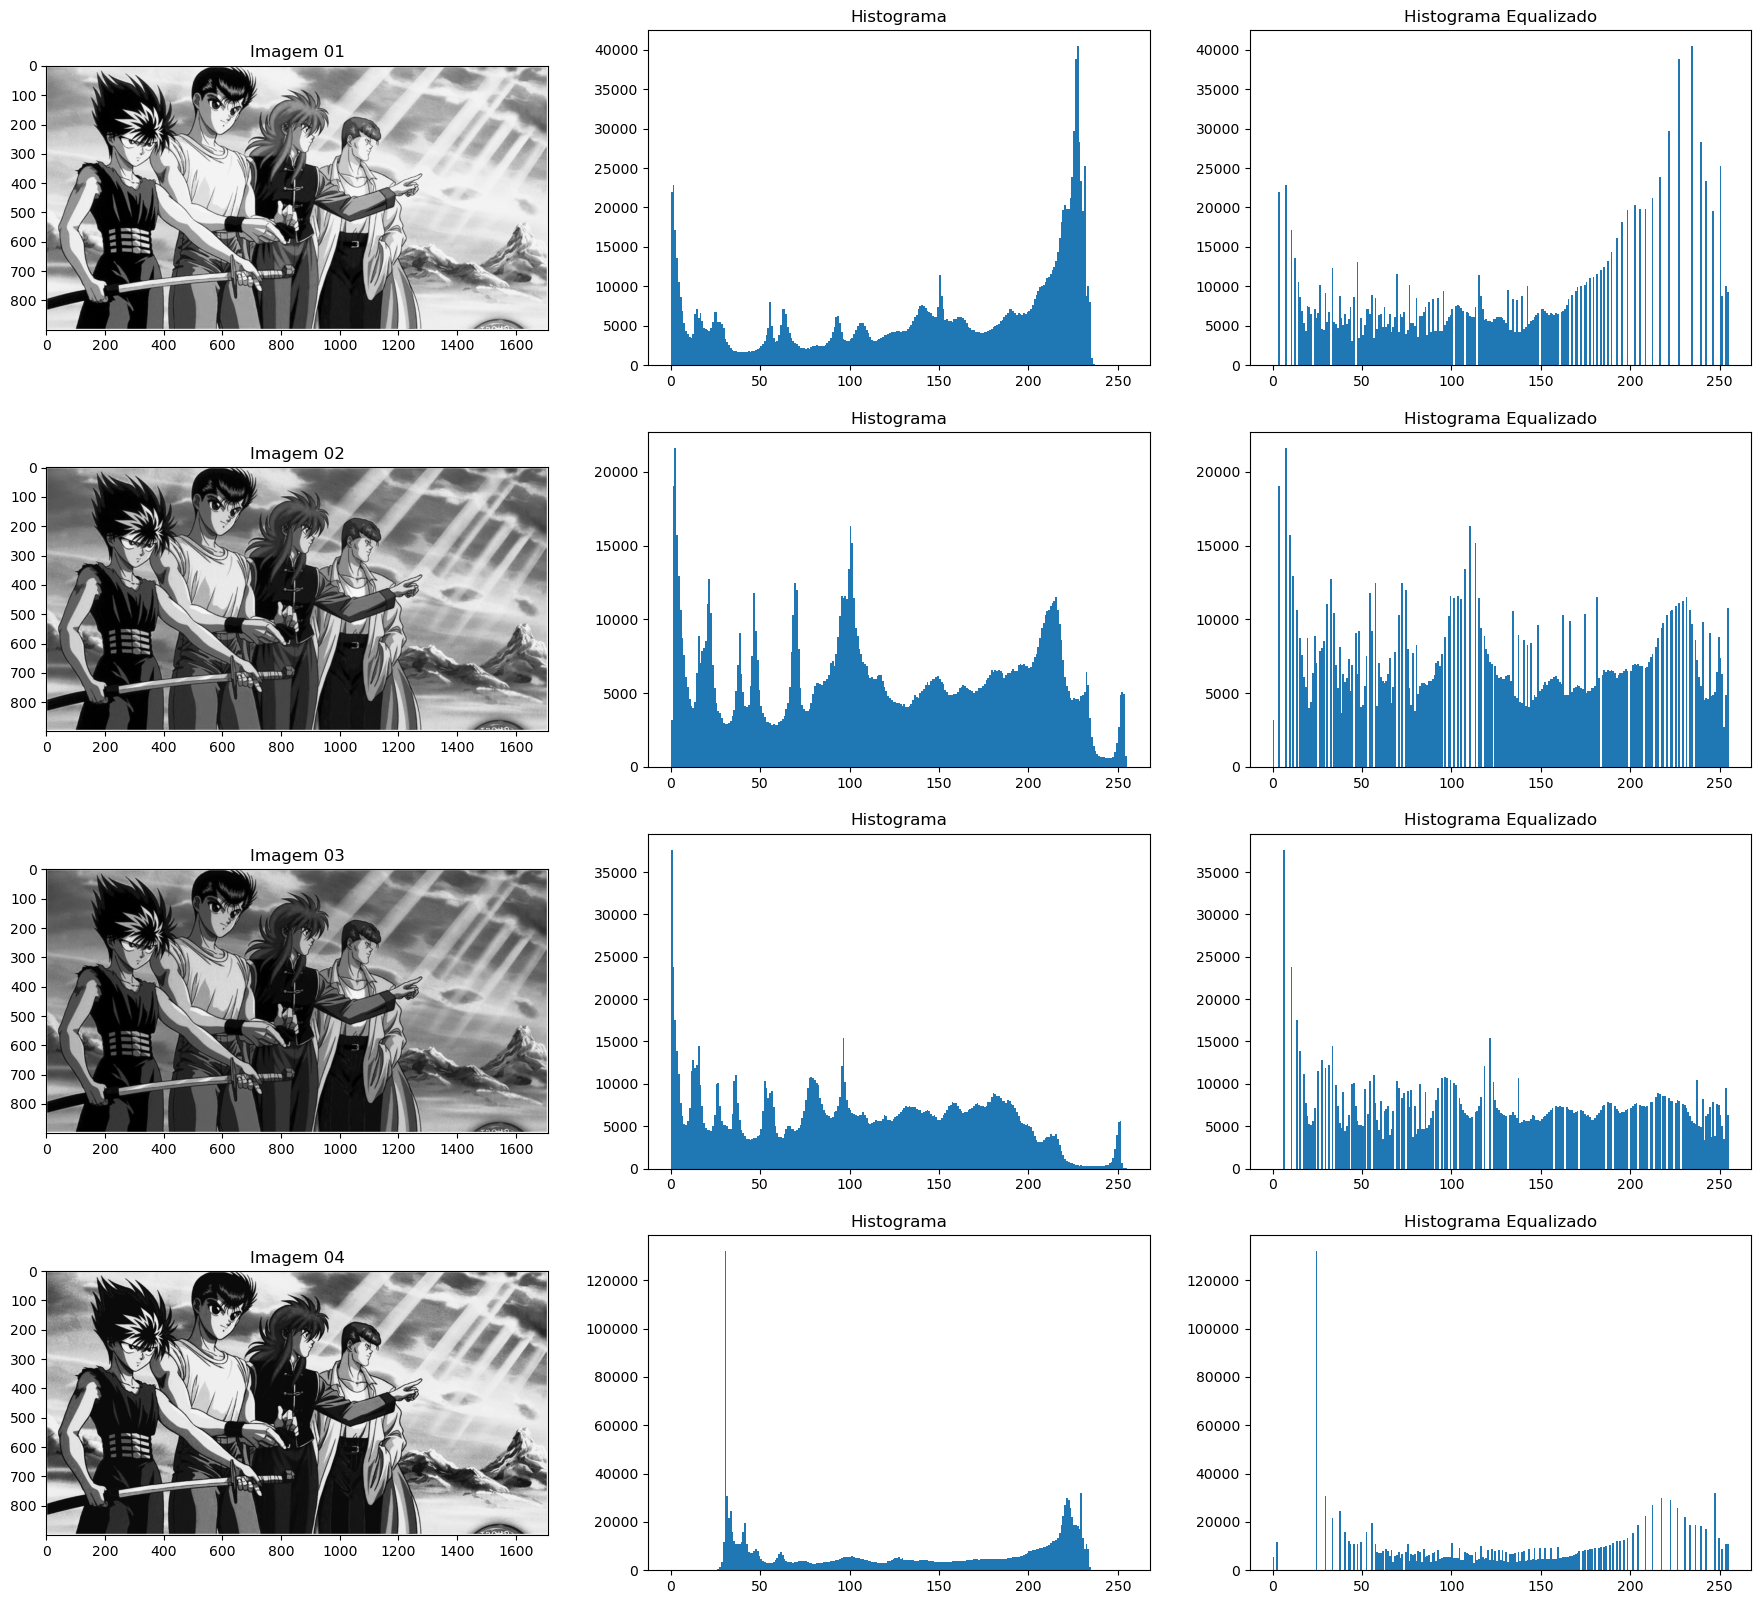

In [32]:
fig, ax = plt.subplots(4,3, figsize=(22,20))

ax[0,0].imshow(img,cmap='gray')
ax[0,0].set_title('Imagem 01')
ax[0,1].hist(img.ravel(),range(256))
ax[0,1].set_title('Histograma')
ax[0,2].hist(newHist.ravel()*255,range(256))
ax[0,2].set_title('Histograma Equalizado')
ax[1,0].imshow(img2,cmap='gray')
ax[1,0].set_title('Imagem 02')
ax[1,1].hist(img2.ravel(),range(256))
ax[1,1].set_title('Histograma')
ax[1,2].hist(newHist2.ravel()*255,range(256))
ax[1,2].set_title('Histograma Equalizado')
ax[2,0].imshow(img3,cmap='gray')
ax[2,0].set_title('Imagem 03')
ax[2,1].hist(img3.ravel(),range(256))
ax[2,1].set_title('Histograma')
ax[2,2].hist(newHist3.ravel()*255,range(256))
ax[2,2].set_title('Histograma Equalizado')
ax[3,0].imshow(img4,cmap='gray')
ax[3,0].set_title('Imagem 04')
ax[3,1].hist(img4.ravel(),range(256))
ax[3,1].set_title('Histograma')
ax[3,2].hist(newHist4.ravel()*255,range(256))
ax[3,2].set_title('Histograma Equalizado')

# Equalização do histograma (manual)

Utilizando duas funções estatisticas a Função Massa de Probabilidade (em inglês PMF), e Função Distribuição Acumulada (em inglês CDF).

### Função Massa de Probabilidade (PMF)

A PMF (Probability Mass Function), consiste em pegar a quantidade de elementos de uma classe e dividir pela quantidade total de elementos do conjunto. Ou seja, basicamente é dividir a quantidade de pixels que possuam o tom X pela quantidade total de pixels na imagem. Logo a PMF retorna a probabilidade de ocorrência do tom X na imagem

In [33]:
def getPmf(hist, totalPixels):
    for i in range(len(hist)):
       hist[i] = hist[i]/totalPixels
    return hist

### Função Distribuição Acumulada (CDF)

A CDF (Cumulative Distribution Function) retorna a probabilidade de ocorrência de um tom menor que o tom analisado. 

In [34]:
def getCdf(pmf):
    for i in range(1, len(pmf)):
        pmf[i] = pmf[i]+pmf[i-1]
    return pmf

### Normalização

Por último é calculado a normalização do valor obtido através da CDF, ou seja,os valores devem estar entre 0-255

In [35]:
def normalize(cdf):
    for i in range(len(cdf)):
        cdf[i] = cdf[i]*255
    return cdf

### Implementação

In [36]:
def equalizeImg(img):
    hist = calcHist([img],[0],None,[256],[0,256])
    pmf = getPmf(hist, img.shape[0]*img.shape[1])
    cdf = getCdf(pmf)
    newCdf = normalize(cdf)
    newImg = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            newImg[i,j] = newCdf[img[i,j]]
    return newImg

In [37]:
eqHist = equalizeImg(img)
eqHist2 = equalizeImg(img2)
eqHist3 = equalizeImg(img3)
eqHist4 = equalizeImg(img4)

Text(0.5, 1.0, 'Equalização (manual)')

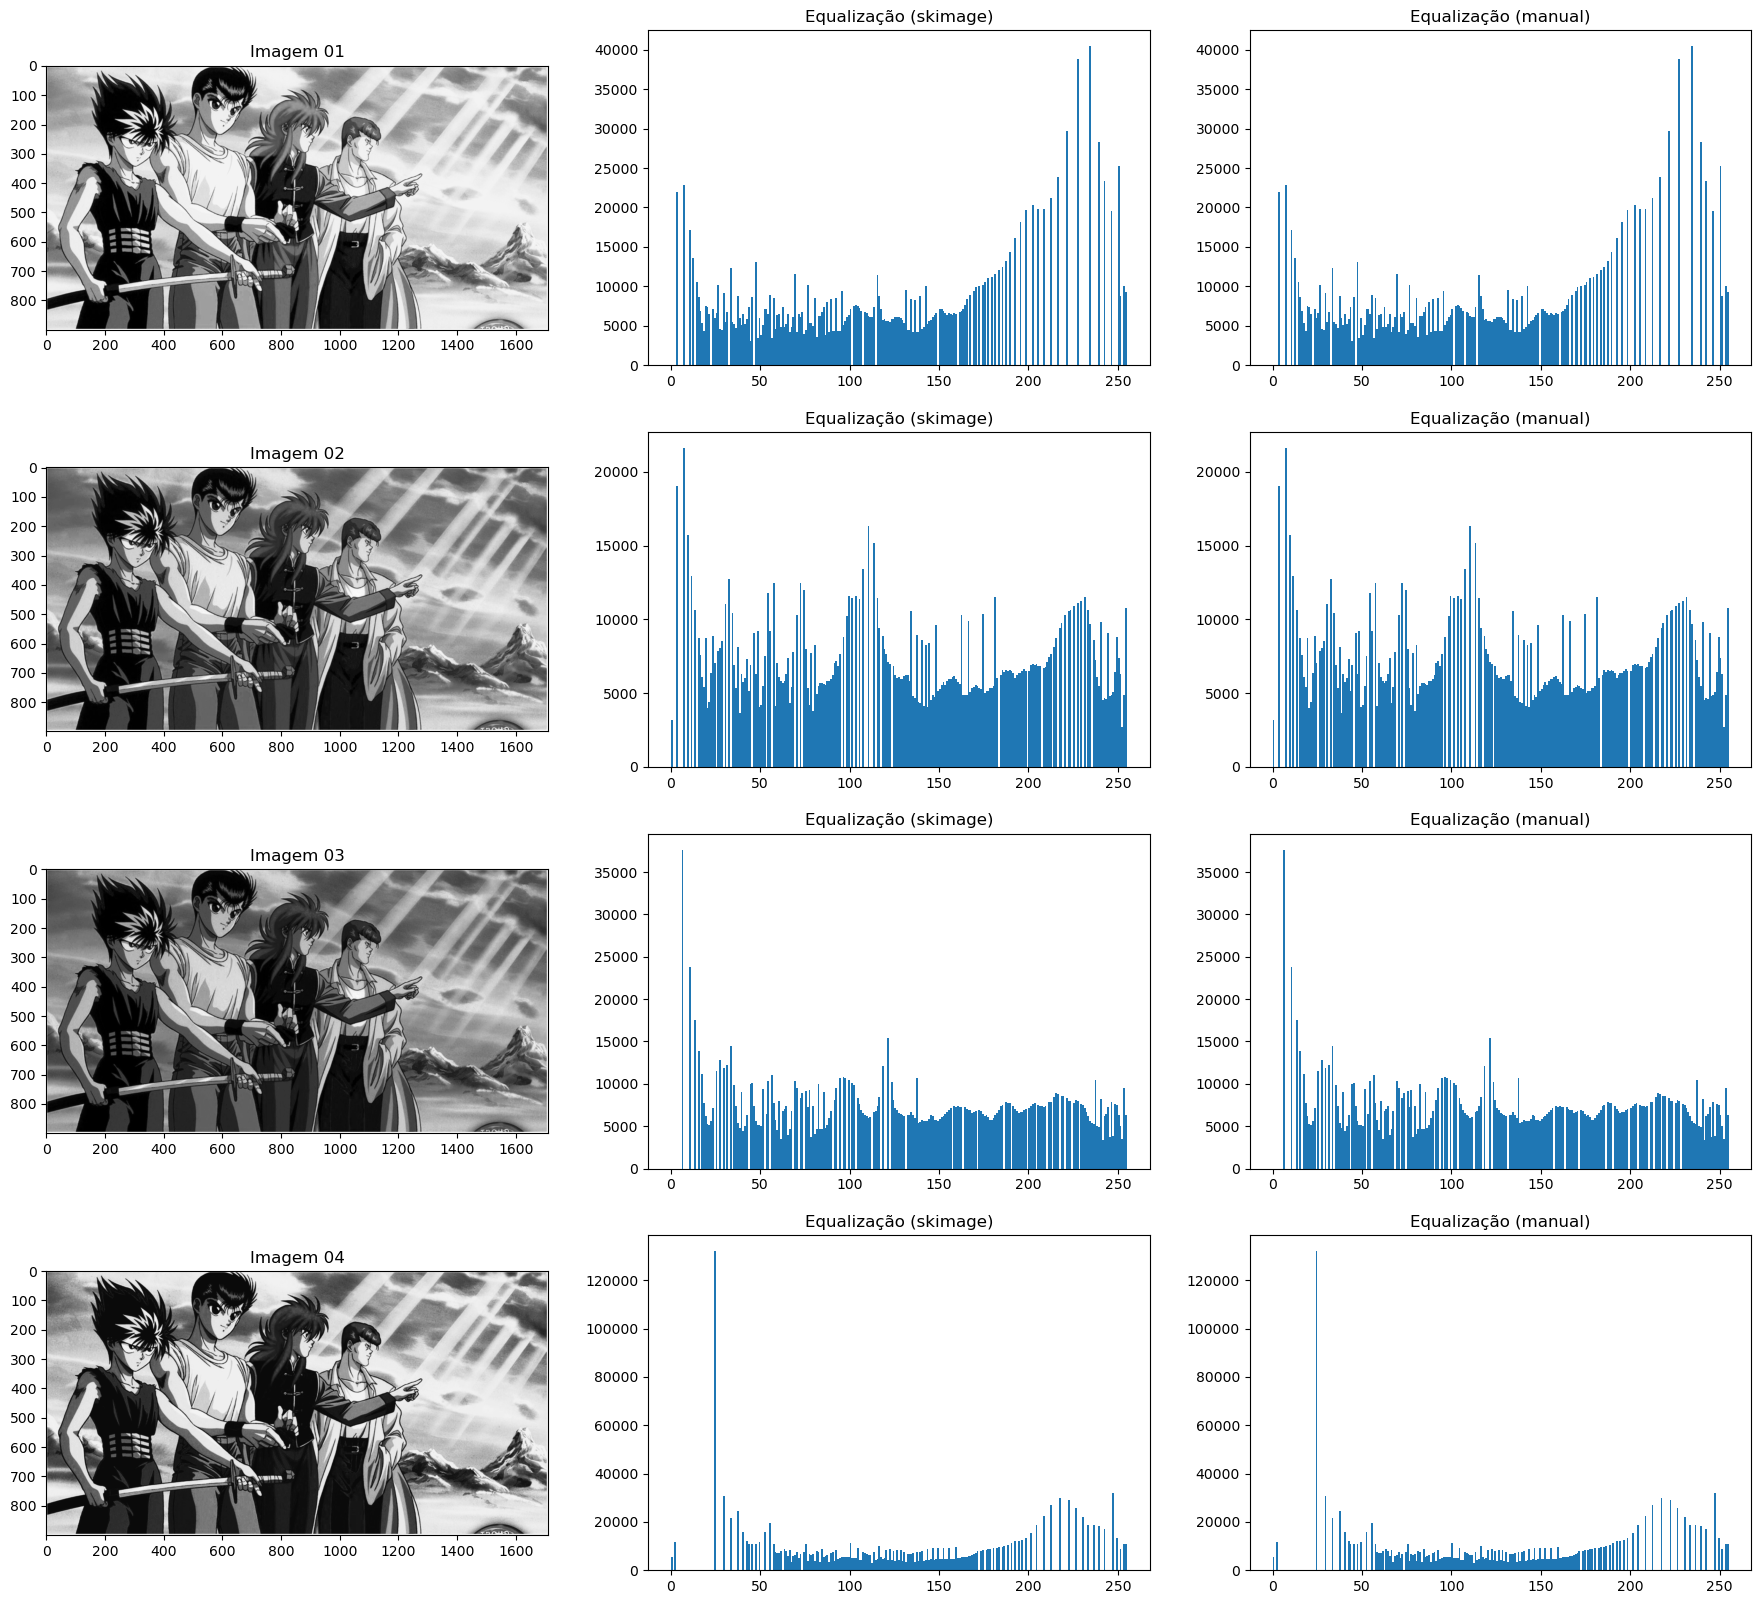

In [38]:
fig, ax = plt.subplots(4,3, figsize=(22,20))
ax[0,0].imshow(img, cmap='gray')
ax[0,0].set_title('Imagem 01')
ax[0,1].hist(newHist.ravel()*255,range(256))
ax[0,1].set_title('Equalização (skimage)')
ax[0,2].hist(eqHist.ravel(),range(256))
ax[0,2].set_title('Equalização (manual)')
ax[1,0].imshow(img2, cmap='gray')
ax[1,0].set_title('Imagem 02')
ax[1,1].hist(newHist2.ravel()*255,range(256))
ax[1,1].set_title('Equalização (skimage)')
ax[1,2].hist(eqHist2.ravel(),range(256))
ax[1,2].set_title('Equalização (manual)')
ax[2,0].imshow(img3, cmap='gray')
ax[2,0].set_title('Imagem 03')
ax[2,1].hist(newHist3.ravel()*255,range(256))
ax[2,1].set_title('Equalização (skimage)')
ax[2,2].hist(eqHist3.ravel(),range(256))
ax[2,2].set_title('Equalização (manual)')
ax[3,0].imshow(img4, cmap='gray')
ax[3,0].set_title('Imagem 04')
ax[3,1].hist(newHist4.ravel()*255,range(256))
ax[3,1].set_title('Equalização (skimage)')
ax[3,2].hist(eqHist4.ravel(),range(256))
ax[3,2].set_title('Equalização (manual)')

Text(0.5, 1.0, 'Equalização (manual)')

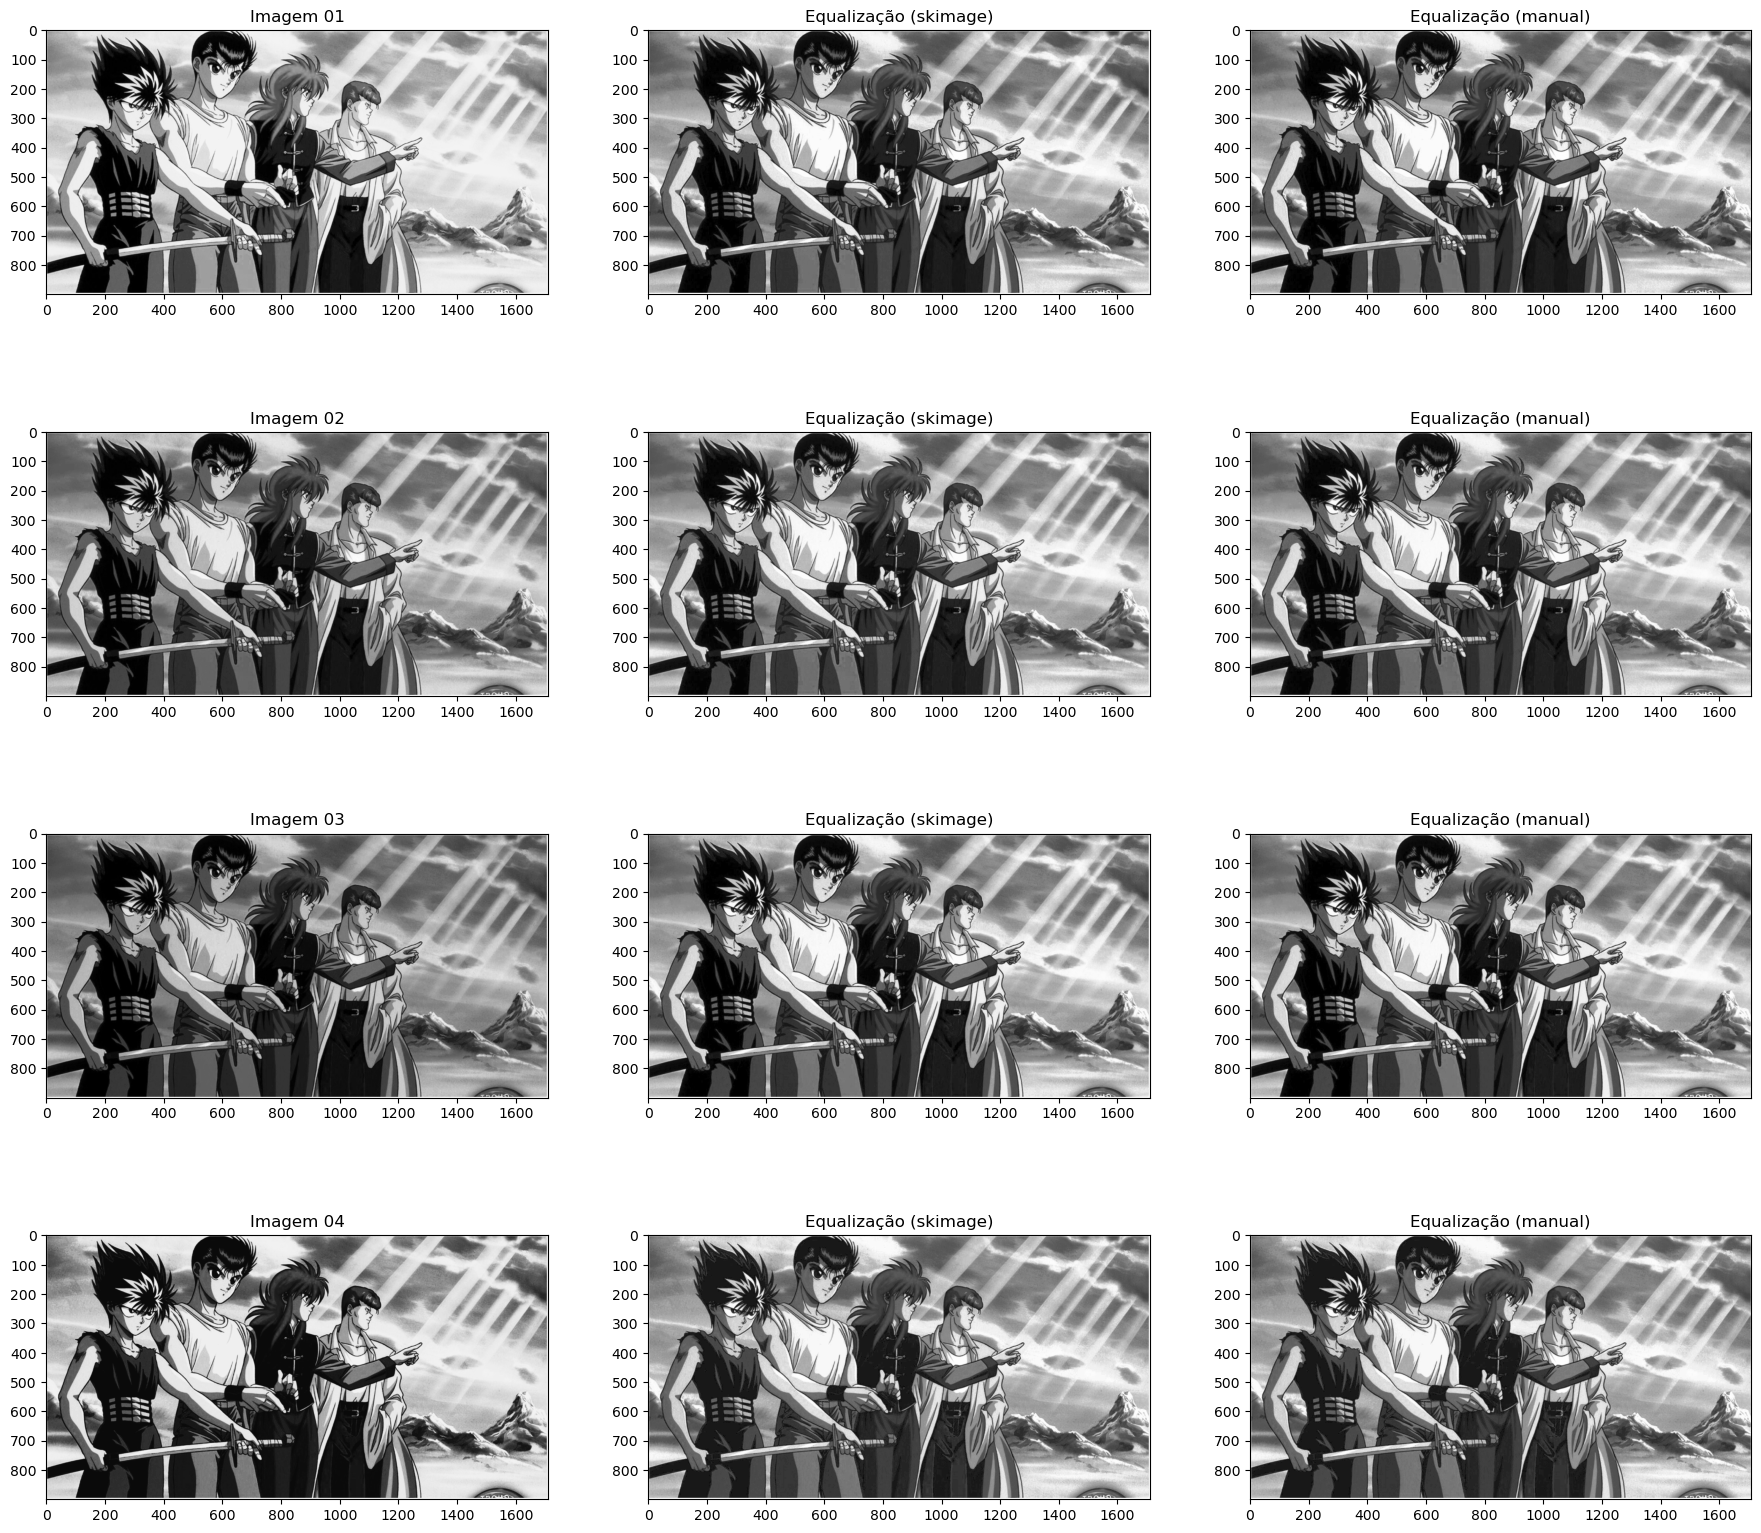

In [39]:
fig, ax = plt.subplots(4,3, figsize=(22,20))
ax[0,0].imshow(img, cmap='gray')
ax[0,0].set_title('Imagem 01')
ax[0,1].imshow(newHist, cmap='gray')
ax[0,1].set_title('Equalização (skimage)')
ax[0,2].imshow(eqHist, cmap='gray')
ax[0,2].set_title('Equalização (manual)')
ax[1,0].imshow(img2, cmap='gray')
ax[1,0].set_title('Imagem 02')
ax[1,1].imshow(newHist2, cmap='gray')
ax[1,1].set_title('Equalização (skimage)')
ax[1,2].imshow(eqHist2, cmap='gray')
ax[1,2].set_title('Equalização (manual)')
ax[2,0].imshow(img3, cmap='gray')
ax[2,0].set_title('Imagem 03')
ax[2,1].imshow(newHist3, cmap='gray')
ax[2,1].set_title('Equalização (skimage)')
ax[2,2].imshow(eqHist3, cmap='gray')
ax[2,2].set_title('Equalização (manual)')
ax[3,0].imshow(img4, cmap='gray')
ax[3,0].set_title('Imagem 04')
ax[3,1].imshow(newHist4, cmap='gray')
ax[3,1].set_title('Equalização (skimage)')
ax[3,2].imshow(eqHist4, cmap='gray')
ax[3,2].set_title('Equalização (manual)')